In [6]:
using PyCall

In [16]:
py"""
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, Matern

np.random.seed(1)

def f(x):
    return x * np.sin(x)
    

def matern_data_1d():
    X = np.atleast_2d([1.,2., 3., 4.,5., 6., 7., 8.]).T
    y = f(X).ravel()
    kernel = 1.0 * Matern(length_scale=1.0, nu=1.5)
    gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
    gp.fit(X, y)
    x = np.atleast_2d(np.linspace(0, 10, 1000)).T
# Make the prediction on the meshed x-axis (ask for MSE as well)
    y_pred, sigma = gp.predict(x, return_std=True)
    return y_pred, sigma
"""
y_pred, sigma = py"matern_data_1d"()

([0.09496984470856162, 0.09936608612553233, 0.10380915862865514, 0.1082994521234042, 0.11283735943223228, 0.11742327631509397, 0.12205760149013489, 0.1267407366545159, 0.13147308650539014, 0.1362550587610194  …  6.442898745817233, 6.426111023511654, 6.409307642829447, 6.392489314847154, 6.375656743115979, 6.35881062372407, 6.341951645358343, 6.3250804893658135, 6.308197829814557, 6.2913043335540735], [2.1641277893444064, 2.144826375579723, 2.125452240088197, 2.1060056719501032, 2.0864869726187285, 2.066896456169961, 2.0472344495572137, 2.027501292871506, 2.007697339607235, 1.9878229569334516  …  3.604243225339442, 3.6167153091557154, 3.6291189359329974, 3.641454324895282, 3.653721696732378, 3.6659212735557882, 3.678053278855262, 3.690117937456148, 3.7021154754774046, 3.7140461202903885])

In [37]:
using Plots, PyPlot

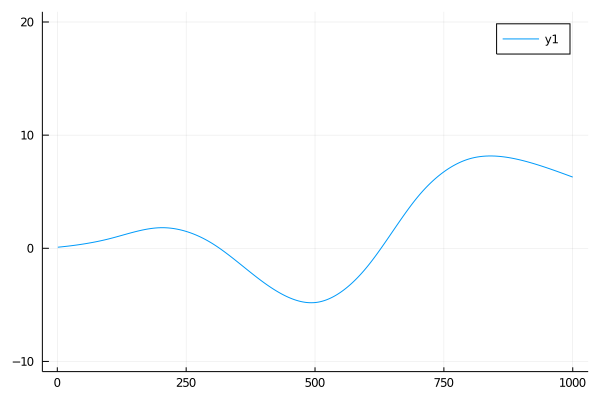

In [22]:
Plots.plot(y_pred, ylim=[-10,20])

In [31]:
include("../Matern1D2D.jl")

Matern3D

In [47]:
No_of_nodes_discarded = 900
discard = rand(2:length(y_pred)-1, No_of_nodes_discarded);
discard = unique(discard);
missing_data = copy(y_pred)
missing_data[discard].=-100
Plots.plot(missing_data, ylim=[-10,20])
len = length(y_pred)
h = 1e-2
nu = 1.5
dimension = 1

1

In [49]:
A1D = ∇²1d_Grid(len, h)
C = sparse(I, len, len)
for i in discard
    C[i,i] = 0;
end
Id = sparse(I, len, len);
f = y_pred[:];
u =((C-(Id -C)*A1D)) \ (C*f);
restored_data_laplace = u;
A = ∇²1d_Grid(len, h);
epsilon = 0.1
sizeA = size(A,1);
for i = 1:sizeA
    A[i,i] = A[i,i] + epsilon^2
end

A2DM = A*A;
u =((C-(Id -C)*A2DM)) \ (C*f);
restored_data_matern = u

1000-element Array{Float64,1}:
 0.09496984470856162
 0.09936608612553233
 0.10380915862865514
 0.10829945074999996
 0.11283735808272084
 0.11742327631509397
 0.12205760123130457
 0.1267407366545159
 0.13147308650539014
 0.13625505915159677
 0.14108706418201145
 0.1459695112854382
 0.15090282341708725
 ⋮
 6.476502930347791
 6.459766968372928
 6.442994703793441
 6.4261777306355095
 6.409307642829447
 6.3923760341929095
 6.375656743115979
 6.359423608406974
 6.341951645358343
 6.321515866778515
 6.303004139339247
 6.2913043335540735

In [102]:

Plot_Matrix =[y_pred, restored_data_laplace, restored_data_matern]
#plot(y_pred, label="Original Data")
# #plot!(missing_data, title="Data with missing points");
# Plots.plot(restored_data_laplace, label="Laplace interpolated data");
# Plots.plot!(restored_data_matern, label="Matern, m = 2, eps = 0.1");
# #Plots.plot(plot1, plot2, plot3, plot4, layout = (2, 2), legend = false)
Plots.plot(discard, -5*ones(size(discard)), seriestype = :scatter, label = "Missing Data")
Plots.plot!(Plot_Matrix, labels=["Original Data" "Laplace Interpolation" "Matern Interpolation"], legend=:topleft, lw = 3)
png("1D_MaternInterpolation.png")

In [88]:
error_laplace = abs.(restored_data_laplace - y_pred);
error_matern = abs.(restored_data_matern - y_pred);
Errors = [error_laplace, error_matern];

In [103]:
Plots.plot(Errors, labels=["Laplace Interpolation Error" "Matern Interpolation Error"], legend=:topleft)
png("1D_InterpolationError.png")